# MySql + ChEMBL + RDKit

The purpose of this script is to connect to MySql server and run a number of queries to get data from ChEMBL database (version 22.1)

In [9]:
import mysql.connector
from mysql.connector import errorcode

config = {
  'user': 'joseph',
  'password': 'password',
  'host': '192.168.151.11',
  'database': 'chembl_22',
  'raise_on_warnings': True,
}

In [12]:
try:
  cnx = mysql.connector.connect(**config)

  cursor = cnx.cursor()

  query = ("SELECT name, creation_date, comments FROM version;")

  cursor.execute(query)

  for (name, creation_date, comments) in cursor:
    print("{}, {:%d %b %Y}, {}".format(
      name, creation_date, comments))

except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cnx.close()

ChEMBL_22, 08 Aug 2016, ChEMBL Release 22


In [17]:
%matplotlib inline
%pylab inline
from IPython.display import Image
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

Populating the interactive namespace from numpy and matplotlib


(u'Cc1cc(ccc1C(=O)c2ccccc2Cl)N3N=CC(=O)NC3=O',)


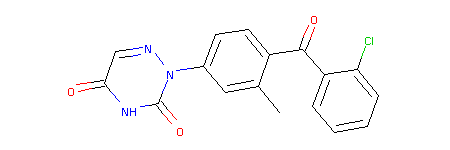

In [21]:
# fetch one molecule from chembl and plot it!
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()
cursor.execute("SELECT canonical_smiles FROM compound_structures limit 1;")
row = cursor.fetchone()
cnx.close()

print row

m1 = Chem.MolFromSmiles(row[0])
m1